# Bank Marketing Project 

dataset source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('bank_marketing_train.csv', sep=';')
test_df = pd.read_csv('bank_marketing_test.csv', sep=';')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


The train file holds 90% of the data and the test file holds the other 10% (they both include the target column, "y"). I think that ratio is a little too high and an 80/20 split would allow for a more thorough test set. Subsequently, I'm going to concatenate these two files and then perform a new train-test split.

In [7]:
rejoined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
rejoined_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Tidying up the datetime columns and performing the train-test-split

Before doing a train-test-split, I'd like to be able to see how the date columns work throughout the year. To that end, I'll convert them to a 'month-day' datetime column, which I can do here before the train-test-split without producing any data leakage.

In [8]:
#Making sure the 'month' column is exhaustive 
rejoined_df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [9]:
#converting the 'month' column to a datetime-conversion-friendly format
month_abbr_to_num = {
    "jan": '01',
    "feb": '02',
    "mar": '03',
    "apr": '04',
    "may": '05',
    "jun": '06',
    "jul": '07',
    "aug": '08',
    "sep": '09',
    "oct": '10',
    "nov": '11',
    "dec": '12',
}
rejoined_df['month'] = rejoined_df['month'].map(month_abbr_to_num)
rejoined_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,05,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,05,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,05,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,05,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,05,198,1,-1,0,unknown,no


In [10]:
#First converting the 'day' column to a string column
rejoined_df['str_day'] = rejoined_df['day'].apply(str)

In [11]:
#Now adding in the leading zeroes before converting to datetime
# since Python wouldn't allow it when they were integers
leading_zeroes_dict = {
    '1': '01',
    '2': '02',
    '3': '03',
    '4': '04',
    '5': '05',
    '6': '06',
    '7': '07',
    '8': '08',
    '9': '09',
}
rejoined_df['str_day'] = rejoined_df['str_day'].map(leading_zeroes_dict).fillna(rejoined_df['str_day'])
#Making sure it worked
rejoined_df['str_day'].unique()

array(['05', '06', '07', '08', '09', '12', '13', '14', '15', '16', '19',
       '20', '21', '23', '26', '27', '28', '29', '30', '02', '03', '04',
       '11', '17', '18', '24', '25', '01', '10', '22', '31'], dtype=object)

In [12]:
#creating a 'month-day' column that will better help keep track of annual trends
rejoined_df['month-day'] = rejoined_df['month'] + rejoined_df['str_day']
rejoined_df['month-day'] = pd.to_datetime(rejoined_df['month-day'], format='%m%d')
rejoined_df['month-day'] = rejoined_df['month-day'].dt.strftime('%m-%d')

#dropping the now-unnecessary 'str_day' column
rejoined_df.drop('str_day', axis=1, inplace=True)

#converting the original 'month' and 'day' columns back into integers:
rejoined_df['month'] = rejoined_df['month'].apply(int)
rejoined_df['day'] = rejoined_df['day'].apply(int)

rejoined_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month-day
33883,41,management,married,tertiary,no,2767,no,no,cellular,30,4,75,1,-1,0,unknown,no,04-30
23187,35,technician,married,secondary,no,0,no,no,cellular,27,8,106,4,-1,0,unknown,no,08-27
44388,34,admin.,married,tertiary,no,0,yes,yes,cellular,3,8,108,2,180,7,failure,no,08-03
2517,44,admin.,married,secondary,no,1362,yes,no,unknown,13,5,46,1,-1,0,unknown,no,05-13
48299,31,technician,single,secondary,no,2544,no,no,cellular,15,7,252,1,184,3,success,yes,07-15
28974,38,management,married,tertiary,no,1198,yes,no,cellular,2,2,63,1,-1,0,unknown,no,02-02
228,36,blue-collar,married,unknown,no,1033,no,no,unknown,5,5,238,2,-1,0,unknown,no,05-05
34912,46,blue-collar,married,primary,no,91,yes,no,cellular,6,5,29,1,356,2,failure,no,05-06
11149,46,management,single,tertiary,no,46,no,yes,unknown,18,6,107,1,-1,0,unknown,no,06-18
1636,30,blue-collar,married,primary,no,265,yes,yes,unknown,9,5,380,1,-1,0,unknown,no,05-09


One last change I can make without data leakage would be to turn the target column ("y") values into 0's and 1's (for "no" and "yes", respectively). 

In [13]:
y_column_integer_map = {'no': 0, 'yes': 1}
rejoined_df['y'] = rejoined_df['y'].map(y_column_integer_map)
rejoined_df['y'].value_counts()

0    43922
1     5810
Name: y, dtype: int64

In [14]:
#Now to train-test-split with a larger test size than the original dataset files had
X = rejoined_df.drop('y', axis=1)
y = rejoined_df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=713)

In [15]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,month-day
22065,51,housemaid,married,primary,no,3486,no,no,cellular,20,8,135,11,-1,0,unknown,08-20
23946,54,blue-collar,married,secondary,no,466,no,no,cellular,29,8,436,4,-1,0,unknown,08-29
14232,35,blue-collar,married,secondary,no,1287,yes,no,cellular,14,7,330,2,-1,0,unknown,07-14
15211,50,blue-collar,married,secondary,no,19,no,no,cellular,17,7,209,4,-1,0,unknown,07-17
24198,34,technician,single,secondary,no,105,yes,no,cellular,17,11,303,1,196,2,failure,11-17


## Understanding each feature

Some columns are self-explanatory, such as 'age', 'job', 'marital' status, 'education' level, best way to 'contact', and the target ('y'). Others are not as straightforward, so let's consult the data dictionary [found with the dataset here](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data):

**basic client information:**
- 'default' shows whether they've defaulted on credit before
- 'balance' refers to the average yearly account balance
- 'housing' (yes/no) shows whether they have a housing loan
- 'loan' (yes/no) shows whether they have a personal loan

**current marketing campaign data:**
- 'day', 'month', and 'duration' refer to the last time the bank contacted the client via phone in terms of the day of the month, the month, and the duration of that last call in seconds. 
- 'campaign' refers to the 'number of contacts performed during this campaign and for this client' and this 'includes the last contact'

**previous campaign data:**
- 'pdays' refers to the 'number of days that passed by after the client was last contacted from a previous campaign' and '-1 means client was not previously contacted'
- 'previous' refers to the 'number of contacts performed before this campaign and for this client'
- 'poutcome' refers to the 'outcome of the previous marketing campaign'

### Let's also examine how these columns' values are distributed. First, the continuous features:

In [16]:
X_train_continuous = X_train[['age', 'balance', 'campaign', 'pdays', 'previous']]

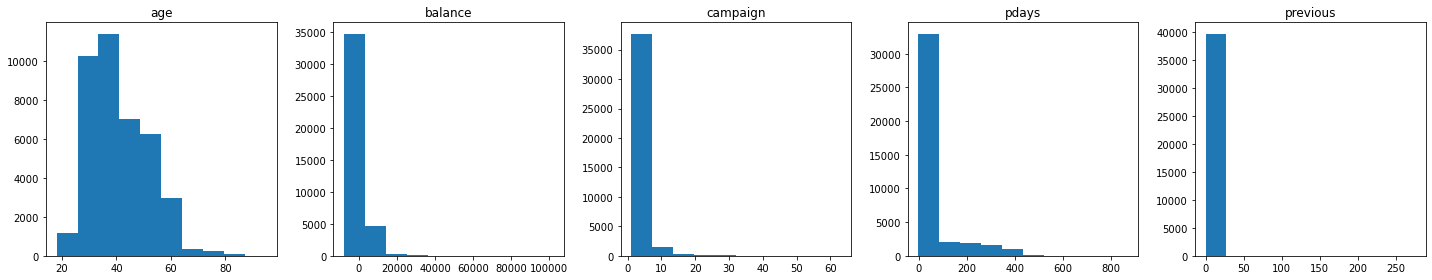

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,4))
for index, col in enumerate(X_train_continuous):
    axes[index].hist(X_train_continuous[col])
    axes[index].set_title(X_train_continuous.columns[index])
plt.tight_layout();

Each of these distributions skew left. It turns out that [continuous features do not need to be normally distributed in a classification problem](https://www.sciencedirect.com/topics/nursing-and-health-professions/logistic-regression-analysis#:~:text=Logistic%20regression%20does%20not%20assume,equal%20variance%20within%20each%20group), but nonetheless it is worth noting that all these attributes except for 'age' start on zero and contain a few high outliers. 

Before I examine the categorical columns, the date information is kind of in a grey area. Let's check out how the months look:

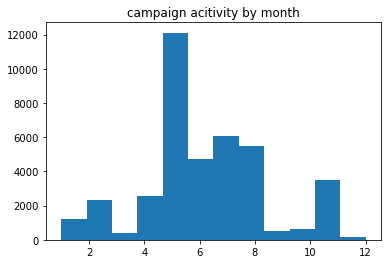

In [18]:
fig, ax = plt.subplots()
ax.hist(X_train['month'], bins=12)
ax.set_title('campaign acitivity by month');

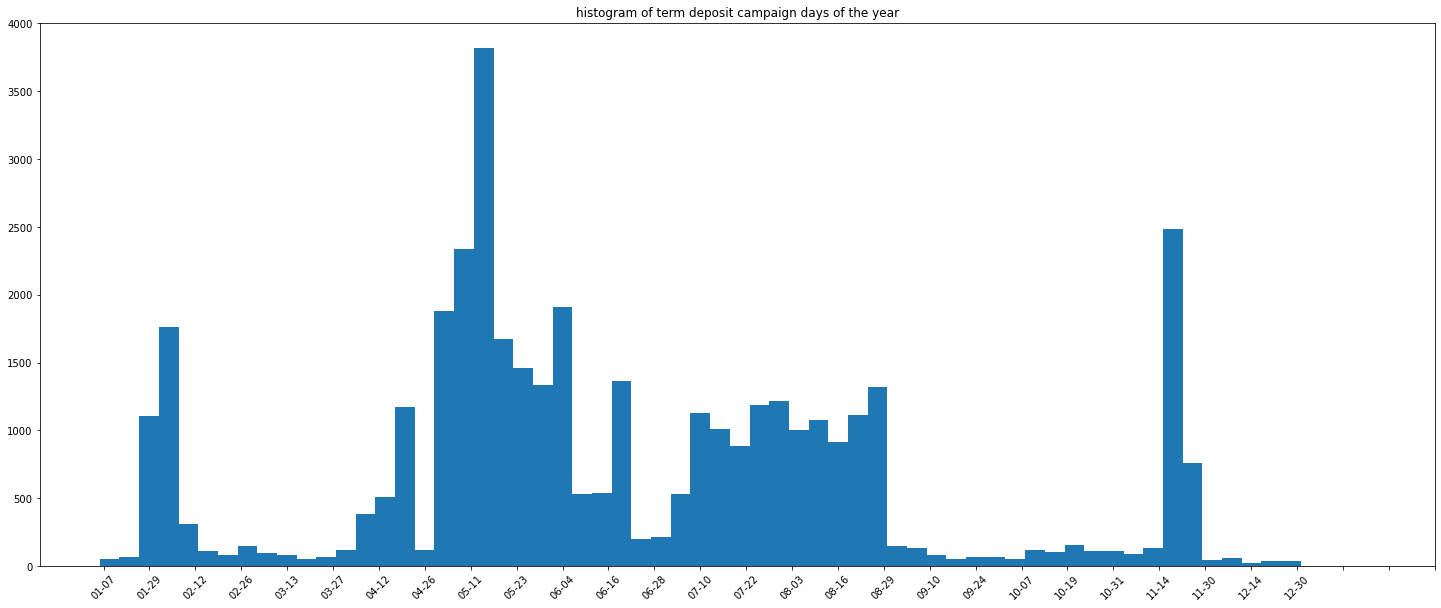

In [19]:
#Have to do a little legwork to resort the 'month-day' column for a histogram
X_train_month_day_sorted = X_train['month-day'].copy()
X_train_month_day_sorted.sort_values(inplace=True)
#Plotting the histogram
x_ticks_range = np.arange(1, 360, 12)
fig, ax = plt.subplots(figsize=(25,10))
ax.hist(X_train_month_day_sorted, bins='auto')
ax.set_title('histogram of term deposit campaign days of the year')
plt.xticks(x_ticks_range, rotation=45);

This is just the months/days of the year for the records in our dataset; not the successful conversion attempt days. Nonetheless, we can see they were a lot more active during the summer with a few spikes along the way in late-January/early-February, April, and then a pretty big one during November.

### Now let's see how the other categorical columns look. 

This graph may be a little hard to read in detail, but for now, I'm just looking to see the general distribution of each column, not the details.

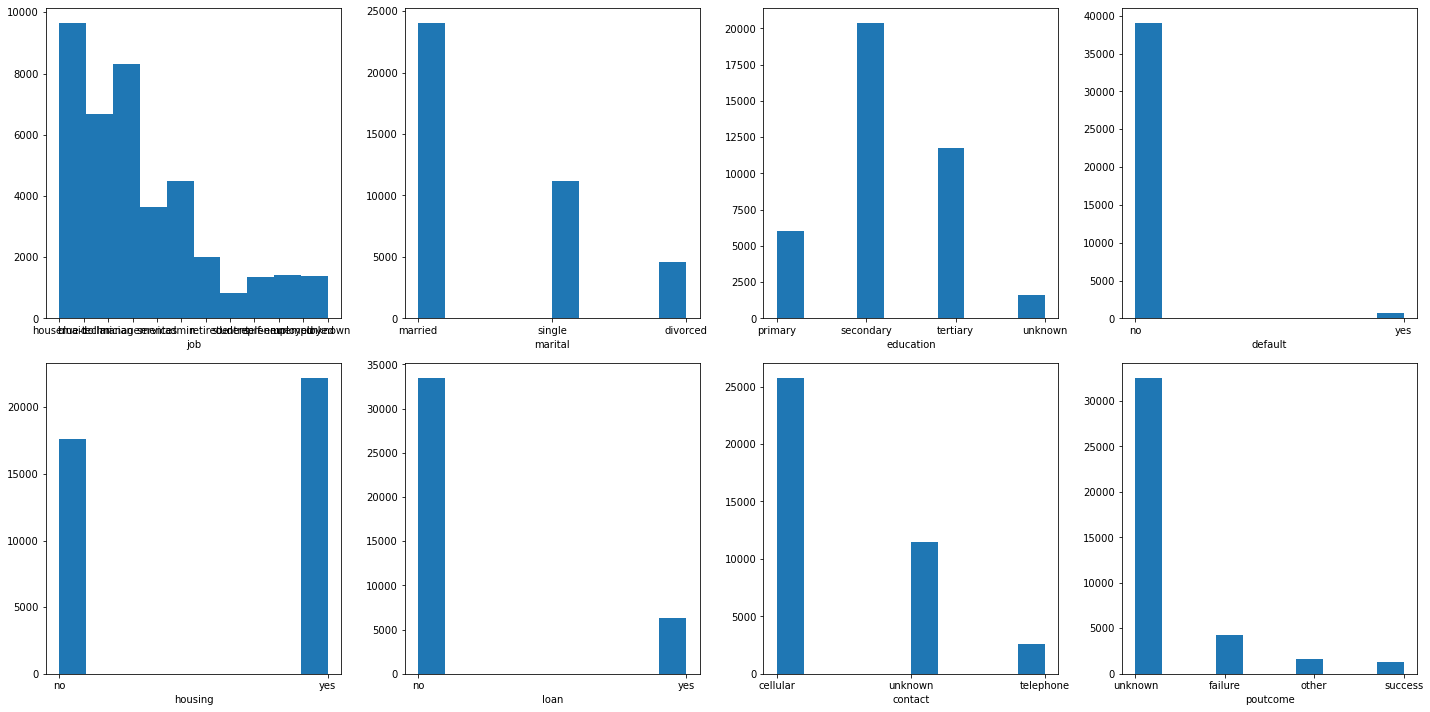

In [20]:
X_train_categorical = X_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
for i, column in enumerate(X_train_categorical.columns):
    row = i//4
    col = i%4
    ax = axes[row][col]
#    ax.hist(column, density=True)
#    ax.hist(column, bins='auto')
    ax.hist(X_train[column])
    ax.set_xlabel(column)
plt.tight_layout();

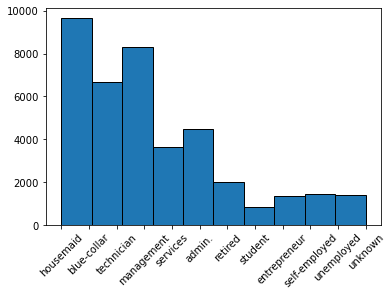

In [21]:
#The job one is hard to see, here it is on its own.
plt.hist(X_train['job'], edgecolor='black')
plt.xticks(rotation=45);

So, when it comes to issue of entropy, it looks like the 'default' and 'loan' columns would make the best case for earlier splits in a decision tree, with 'poutcome' next, then probably 'marital', 'contact', and 'education' won't be too far behind, then 'job' and 'housing' round out the end of the line. Of course, we won't know until we run a decision tree model. 

## establishing a baseline model

I think a decision tree is the best way to go right now and then, if we want to "exceed objectives" later, we can try a scikit-learn or StatsModels classification model later. But ultimately, I don't how else I'd find out which attributes correlate best outside of a decision tree. 

I know decision trees are all about how you set them up, pruning, and hyperparameters. To that end, maybe our "baseline" here is a "vanilla" model where we don't do any of that stuff first.

In [22]:
#Importing everything we'll need for our baseline model
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [23]:
#one-hot encoding the categorical columns
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X_train.columns))
#instantiating & fitting the DecisionTreeClassifier model
clf_baseline = DecisionTreeClassifier(criterion='entropy', random_state=713)
clf_baseline.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=713)

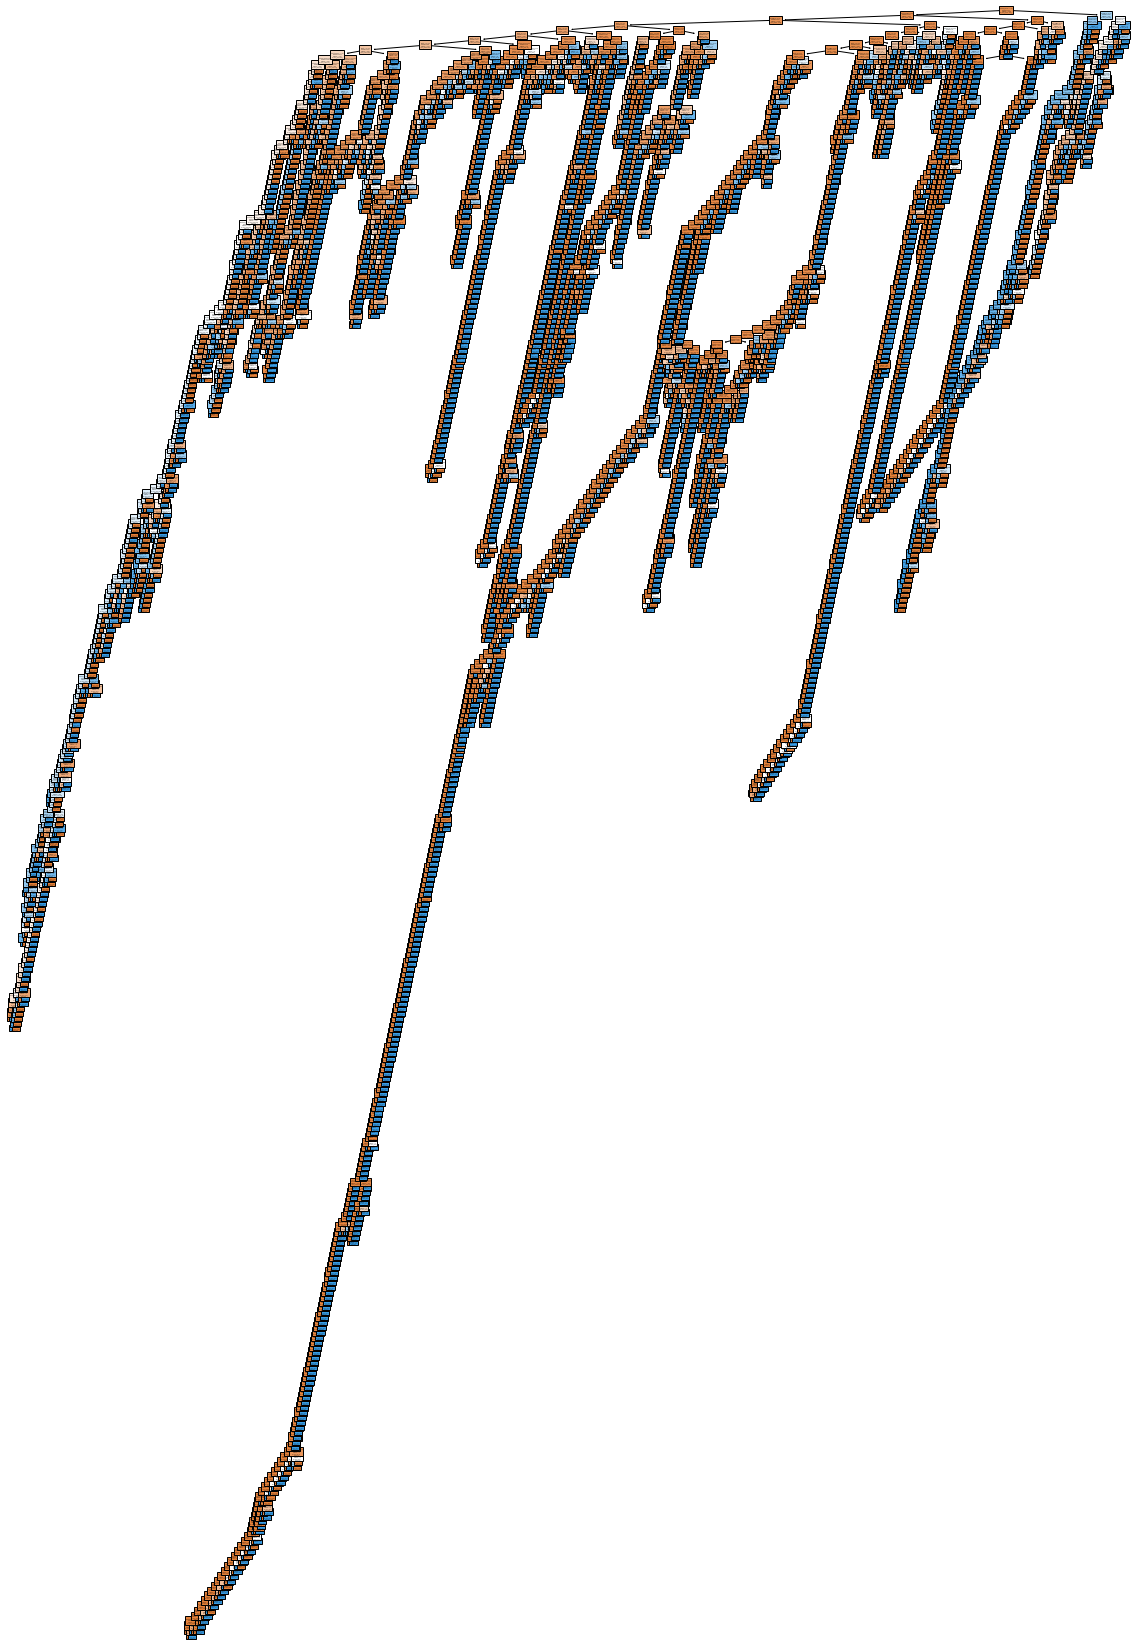

In [24]:
#Checking out the tree plot
fig, ax = plt.subplots(figsize=(20,30))
tree.plot_tree(clf_baseline,
              feature_names = ohe_df.columns,
              class_names = np.unique(y).astype('str'),
              filled=True)
plt.show();

In [25]:
#Wow, what a monstrosity. We'll definitely need to prune this tree. 

#Let's evaluate with accuracy for now, just to see and get a feel for what's going on:
#X_test_ohe = ohe.transform(X_test)
#y_pred_test = clf.predict(X_test_ohe)
#print('accuracy:', accuracy_score(y_test, y_pred_test))

#WAIT, I'm not supposed to use accuracy, let's see if we can pin down whether we want 
# to priveldge precision, recall, or both (in which case, we'd employ an F1 score.)

Okay, so next is (1) more evaluation metrics (ConfusionMatrices, AUC/ROC, class imbalance, more in my notes) and (2) tree-pruning. I guess the iterative pruning of hyperparameters would take a long time, but it's still feasible.

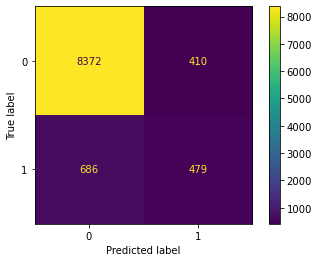

In [27]:
#tranforming X_test with OneHotEncoder and making our y_test predictions
X_test_ohe = ohe.transform(X_test)
y_pred_test = clf_baseline.predict(X_test_ohe)
#importing & building a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test); #8851 / 9947

This reminds me, we need to address the class-imbalance problem. Before we get into that, let's break down this confusion matrix, which shows the model's predictions out from 9,947 test records:

- predicted true positives (bottom right) 479 times (4.8% of all predictions)
- predicted false positives (top right) 410 times (4.1%)
- predicted true negatives (top left) 8,372 times (84.2%)
- predicted false negatives (bottom left) 686 times (6.9%)

So, this model is dealing with somewhat more in the way of false negatives than false positives. **Which is a bigger deal for our stakeholder? Probably false negatives** because they represent current clients who would have made a term deposit, but weren't on the call list given to the hired call center.

False positives probably aren't as big a deal; sure, it's not ideal to have paid the call center to contact those clients who didn't wind up setting an account, but the "wasted" cost for those client calls was likely less than the profit they lose from false positives. All this to say, we want to priveldge **recall** as an evaluation metric here. 

In [28]:
from sklearn.metrics import recall_score
print('recall:', recall_score(y_test, y_pred_test))

recall: 0.4111587982832618


That is a bad recall score. Hopefully our refined models make substantial improvements. Let's check out the ROC/AUC metric.

In [29]:
#Now we're ready to check the area under curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
print('AUC:', auc(fpr, tpr))

AUC: 0.6822361971375316


This is just an okay AUC score; it's definitely better than random guessing, but not by an impressive amount. Again, hopefully pruning our decision tree model and accounting for class imabalance will result in a significant improvement.

In [30]:
#Now we'll do a cross validation score with negative log loss because...we did it in earlier lessons.
from sklearn.model_selection import cross_val_score
baseline_neg_log_loss_cv = cross_val_score(clf_baseline, X_test_ohe, y_test, scoring='neg_log_loss')
baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

4.765042535180511

This is not as interpetable as the other metrics yet, but it will be once we start refining and reevaluating later models. 

### Next steps 

Class imbalance and tree pruning on this model. Afterwards, it's trying the whole thing again with a LogisticRegression model. 

## Addressing target class imbalance

We've learned about the class_weight hyperparameter, but that's for LogisticRegression models, so we'll run that later when we do a second model attempt. Actually, when you finish with the decision tree stuff and do LogisticRegression, go to the Logistic Regression - Cumulative Lab from Topic 26 and do that stuff. 

I'm realizing that class imbalance in decision trees hasn't been discussed yet, just in LogisticRegression. Nonetheless, there *is* a class_weight param for the DecisionTreeCladsifier model, too. What I still don't understand is how to apply the over & under-sampling by percentage technique that Mark discussed to a decision tree.

In [31]:
clf_balanced_class = DecisionTreeClassifier(criterion='entropy', random_state=713, class_weight="balanced")
clf_balanced_class.fit(X_train_ohe, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=713)

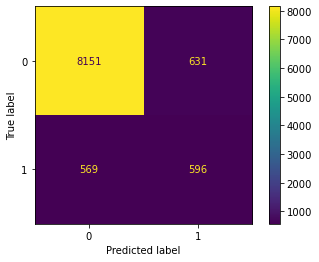

In [32]:
y_pred_test = clf_balanced_class.predict(X_test_ohe)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test);

The class_weight = 'balanced' model:

- predicted true positives (bottom right) 596 times (6% of all predictions, the baseline had 4.8%)
- predicted false positives (top right) 631 times (6.3%, baseline was 4.1%)
- predicted true negatives (top left) 8,151 times (82%, baseline was 84.2%)
- predicted false negatives (bottom left) 569 times (5.7%, baseline was 6.9%)

So, this model predicted more true positives than the baseline, but also more false ones. Of course, that means it wasn't quite as good at predicting true negatives, but it was better at false negatives. This is a mixed bag improvement-wise, but it does bode well for an improvement in the recall score, which we are more concerned with in this case. Let's check to be sure:

In [33]:
print('recall:', recall_score(y_test, y_pred_test))

recall: 0.511587982832618


I think this is a decent, but still somewhat modest improvement over the baseline score of 0.4111587982832618. Let's keep checking evaluation metrics and do the AUC: 

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
print('AUC:', auc(fpr, tpr))

AUC: 0.7198682341856099


Another small improvement over the baseline's 0.6822361971375316. There's definitely more to improve upon here, but we're on our way. Let's finally check the cross-validated loss score:

In [35]:
balanced_class_neg_log_loss_cv = cross_val_score(clf_balanced_class, X_test_ohe, y_test, scoring='neg_log_loss')
balanced_class_log_loss = -(balanced_class_neg_log_loss_cv.mean())
balanced_class_log_loss

5.8701768942159855

This is also an improvement over the baseline's 4.765042535180511 score. 

### Further improvement of the class imbalance problem

So far, we found some modest improvement with the 'balanced' class_weight parameter, but I still need to further tweak it. I'm not sure how, though. Can I use SMOTE here? [The docs also mention a dictionary of class weights to run](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), do I run different dictionaries with SMOTE like we did in that one cumulative lab? 